In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.cluster import KMeans
from sklearn import svm 
from sklearn.metrics import accuracy_score,auc,confusion_matrix,classification_report,precision_score,roc_curve,roc_auc_score,recall_score,f1_score,precision_score
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn import metrics
import missingno as mn
import math as m
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set_palette('husl',8)

In [2]:
car_train = pd.read_csv("Balanced_Train.csv")
car_train.head()

,VehicleAge,VehOdo,MMRAcqAucAvgPrice,MMRAcqAucCleanPrice,MMRAcqRetailAvgPrice,MMRAcqRetailCleanPrice,MMRCurrAucAvgPrice,MMRCurrAucCleanPrice,MMRCurrRetailAvgPrice,MMRCurrRetailCleanPrice,...,VNST_OH,VNST_OK,VNST_Other,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,IsOnlineSale_1
0,-0.835237,0.933869,0.247748,0.467221,1.180846,-1.540819,0.238002,0.517241,1.157712,-1.451163,...,0,0,0,0,0,0,0,0,0,0
1,-1.397633,0.001216,-2.329916,-1.857212,-0.948669,-0.476310,-2.392786,-1.889322,-0.865514,-0.432913,...,0,0,0,0,0,0,0,0,0,0
2,-0.272842,0.507239,0.008406,0.403070,1.102331,-1.462966,0.197271,0.713916,1.275992,-1.175948,...,0,0,0,0,0,0,0,0,0,0
3,-0.272842,-1.187359,0.377304,0.703008,1.219726,-1.408558,0.758929,0.916880,-1.700088,-1.238415,...,0,0,0,0,0,0,0,0,0,0
4,-0.272842,1.122523,1.279150,-2.076962,1.249264,-1.091837,1.740330,-1.758671,-1.618437,-0.783495,...,0,0,0,0,0,0,0,0,0,0


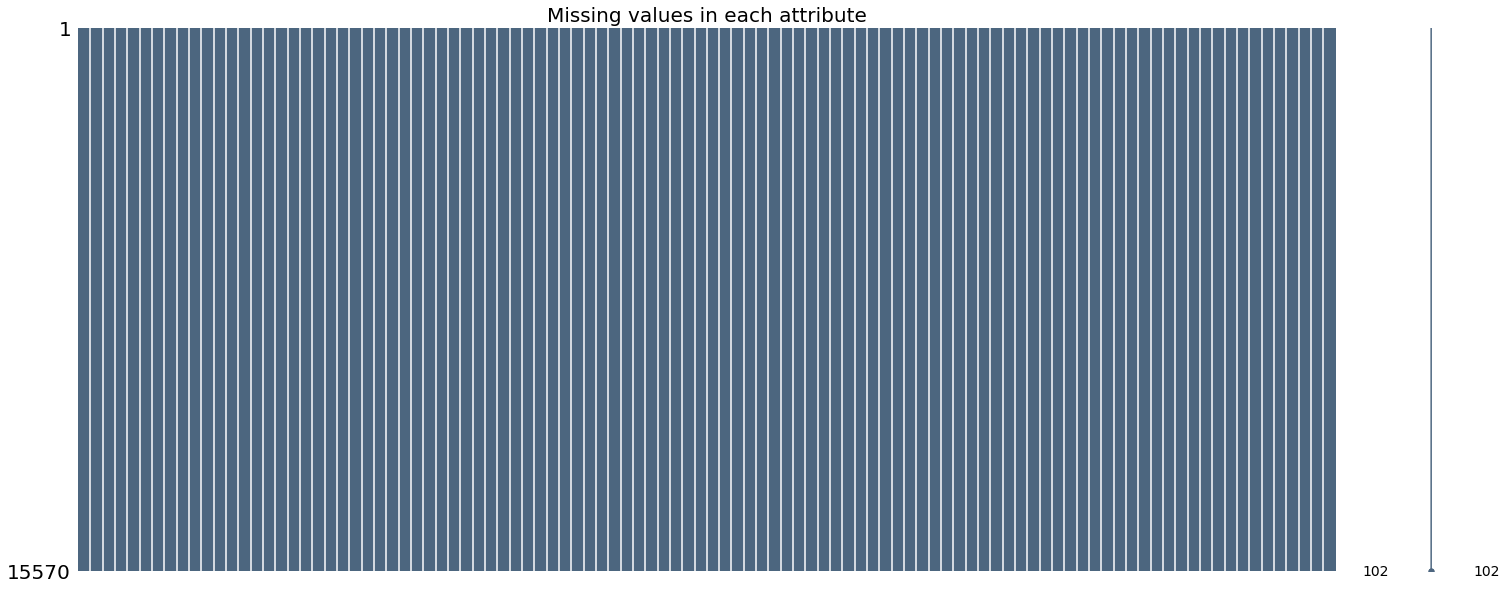

In [3]:
mn.matrix(car_train,color=(0.3,0.4,0.5))
plt.title('Missing values in each attribute',fontsize=20)
plt.show()

In [4]:
car_test = pd.read_csv("Balanced_Test.csv")
car_test.head()

,VehicleAge,VehOdo,MMRAcqAucAvgPrice,MMRAcqAucCleanPrice,MMRAcqRetailAvgPrice,MMRAcqRetailCleanPrice,MMRCurrAucAvgPrice,MMRCurrAucCleanPrice,MMRCurrRetailAvgPrice,MMRCurrRetailCleanPrice,...,VNST_OH,VNST_OK,VNST_Other,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,IsOnlineSale_1
0,1.053821,0.044405,-1.312343,-0.764367,0.229016,0.927131,-1.376007,-0.919087,0.144285,0.528002,...,0,0,0,0,0,0,0,0,0,0
1,1.633295,-1.162048,-1.346205,-0.797326,0.186271,0.680918,-0.886876,-0.385879,0.467927,0.926569,...,0,0,0,0,0,0,0,0,0,0
2,0.474346,1.832012,-1.288804,-0.570569,0.320122,0.892145,-1.247841,-0.667713,0.413946,1.203754,...,0,0,0,0,0,0,0,0,0,0
3,0.474346,-1.332571,-1.155008,-0.655603,0.526517,0.859345,-0.948648,-0.389896,0.558469,1.070526,...,0,0,0,0,0,0,0,0,0,0
4,0.474346,-0.418965,0.753655,0.995968,-1.297327,-0.790018,1.020901,-2.263320,-1.137281,-0.259518,...,0,0,0,0,0,0,0,0,0,0


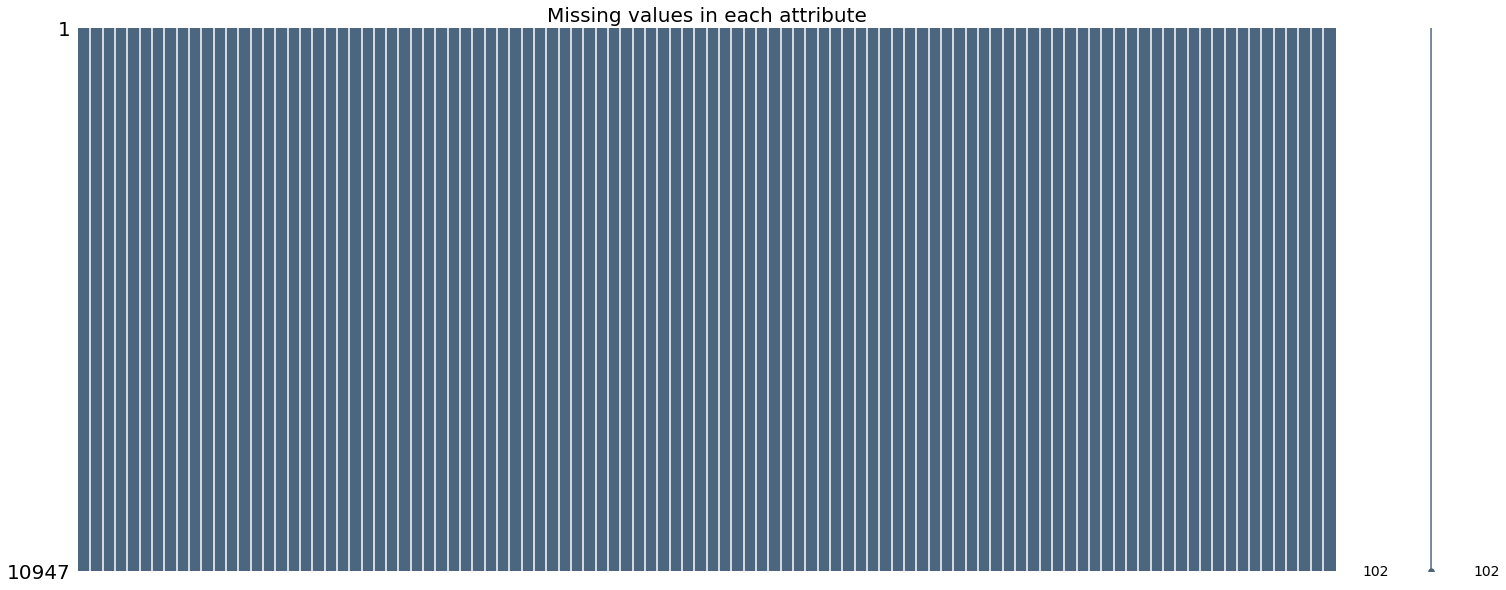

In [5]:
mn.matrix(car_test,color=(0.3,0.4,0.5))
plt.title('Missing values in each attribute',fontsize=20)
plt.show()

### Random Forest

In [0]:
y_train_RF = car_train['IsBadBuy_1']
X_train_RF = car_train.drop(columns=['IsBadBuy_1'])
y_test_RF = car_test['IsBadBuy_1']
X_test_RF = car_test.drop(columns=['IsBadBuy_1'])

In [0]:
rf_clf = RandomForestClassifier(random_state=69)
rf_claf = rf_clf.fit(X_train_RF,y_train_RF)

In [0]:
y_pred_RF = rf_claf.predict(X_test_RF)
metrics.accuracy_score(y_test_RF,y_pred_RF)

0.7624691696355166

In [0]:
print(classification_report(y_test_RF,y_pred_RF))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85     12780
           1       0.26      0.50      0.34      1816

    accuracy                           0.76     14596
   macro avg       0.59      0.65      0.60     14596
weighted avg       0.84      0.76      0.79     14596



In [0]:
pd.crosstab(y_test_RF,y_pred_RF)

col_0,0,1
IsBadBuy_1,,
0,10220,2560
1,907,909


In [0]:
param_grid = {'n_estimators': [300,600,900,1200],
             'max_features': [6,9,12,15]} 

grid_RF = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy',verbose=4,n_jobs=4)
grid_RF.fit(X_train_RF,y_train_RF)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed: 12.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=69,
                                  

In [0]:
grid_RF.best_params_

{'max_features': 12, 'n_estimators': 900}

In [0]:
grid_RF.best_score_

0.6418754014129737

In [0]:
neighbors = [400,500,600,700,800,900]
maxfeatures = [6,9,12,15]
l = []
for i in neighbors:
  for j in maxfeatures:
    rf_clf_best = RandomForestClassifier(max_features = j , n_estimators = i)
    rf_claf_best = rf_clf_best.fit(X_train_RF,y_train_RF)
    y_pred_RF_best = rf_claf_best.predict(X_test_RF)
    best_probs_RF = rf_claf_best.predict_proba(X_test_RF)
    l.append([i,j,round(accuracy_score(y_test_RF,y_pred_RF_best),2),round(recall_score(y_test_RF,y_pred_RF_best),2),
              round(roc_auc_score(y_test_RF, best_probs_RF[:,1]),3)])
  
l

[[400, 6, 0.83, 0.43, 0.741],
 [400, 9, 0.8, 0.47, 0.733],
 [400, 12, 0.76, 0.51, 0.723],
 [400, 15, 0.74, 0.54, 0.716],
 [500, 6, 0.83, 0.43, 0.742],
 [500, 9, 0.82, 0.45, 0.737],
 [500, 12, 0.78, 0.49, 0.727],
 [500, 15, 0.73, 0.54, 0.711],
 [600, 6, 0.83, 0.43, 0.744],
 [600, 9, 0.81, 0.46, 0.736],
 [600, 12, 0.78, 0.5, 0.728],
 [600, 15, 0.73, 0.54, 0.714],
 [700, 6, 0.83, 0.43, 0.742],
 [700, 9, 0.81, 0.46, 0.735],
 [700, 12, 0.79, 0.48, 0.728],
 [700, 15, 0.72, 0.56, 0.712],
 [800, 6, 0.83, 0.43, 0.741],
 [800, 9, 0.81, 0.46, 0.735],
 [800, 12, 0.77, 0.51, 0.725],
 [800, 15, 0.73, 0.54, 0.715],
 [900, 6, 0.83, 0.43, 0.742],
 [900, 9, 0.81, 0.46, 0.738],
 [900, 12, 0.78, 0.5, 0.725],
 [900, 15, 0.73, 0.55, 0.716]]

In [0]:
df1 = pd.DataFrame(l,columns=['nTrees','maxFeatures','Accuracy','Recall','AUC Score'])
df1

,nTrees,maxFeatures,Accuracy,Recall,AUC Score
0,400,6,0.83,0.43,0.741
1,400,9,0.80,0.47,0.733
2,400,12,0.76,0.51,0.723
3,400,15,0.74,0.54,0.716
4,500,6,0.83,0.43,0.742
5,500,9,0.82,0.45,0.737
6,500,12,0.78,0.49,0.727
7,500,15,0.73,0.54,0.711
8,600,6,0.83,0.43,0.744
9,600,9,0.81,0.46,0.736


In [0]:
df1.to_csv('df_RF.csv', index=False)

In [0]:
rf_clf_best = RandomForestClassifier(max_features = 12 , n_estimators= 900 )
rf_claf_best = rf_clf_best.fit(X_train_RF,y_train_RF)

In [0]:
y_pred_RF_best = rf_claf_best.predict(X_test_RF)
metrics.accuracy_score(y_test_RF,y_pred_RF_best)

0.6619165068055175

In [0]:
print(classification_report(y_test_RF,y_pred_RF_best))

              precision    recall  f1-score   support

           0       0.94      0.66      0.77      9637
           1       0.21      0.69      0.33      1310

    accuracy                           0.66     10947
   macro avg       0.58      0.67      0.55     10947
weighted avg       0.85      0.66      0.72     10947



In [0]:
best_probs_RF = rf_claf_best.predict_proba(X_test_RF)
print('Area under the curve for Random Forest: ROC AUC=%.3f' % (roc_auc_score(y_test_RF, best_probs_RF[:,1])))

Area under the curve for Random Forest: ROC AUC=0.748


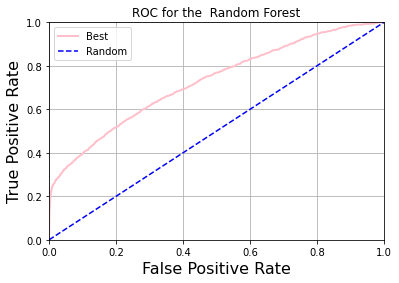

In [0]:
fpr, tpr, _ = roc_curve(y_test_RF, best_probs_RF[:,1])
plt.plot(fpr, tpr, linewidth=2, label='Best',color='pink')
plt.plot([0, 1], [0, 1],linestyle='--', label='Random',color='blue')
plt.axis([0, 1, 0, 1])                                   
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16) 
plt.title('ROC for the  Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [0]:
feature_imp = pd.DataFrame(rf_claf.feature_importances_, index=X_train.RF.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
WheelType_OTHER,0.103410
VehicleAge,0.065528
VehOdo,0.052716
MMRAcqAucAvgPrice,0.049200
VehBCost,0.048689
...,...
SubModel_4DSEDANLT3.5L,0.000267
Model_AVENGER4C,0.000243
Model_IMPALA3.5LV6SFI,0.000240
Nationality_OTHER,0.000239


### GBM

In [0]:
y_train_GBM = car_train['IsBadBuy_1']
X_train_GBM = car_train.drop(columns=['IsBadBuy_1'])
y_test_GBM = car_test['IsBadBuy_1']
X_test_GBM = car_test.drop(columns=['IsBadBuy_1'])

In [0]:
gbm_clf = GradientBoostingClassifier(random_state=42)
gbm_claf = gbm_clf.fit(X_train_GBM,y_train_GBM)

In [0]:
y_pred_GBM = gbm_claf.predict(X_test_GBM)
accuracy_score(y_test_GBM,y_pred_GBM)

0.4653329679364209

In [0]:
print(classification_report(y_test_GBM,y_pred_GBM))

              precision    recall  f1-score   support

           0       0.93      0.42      0.58     12780
           1       0.16      0.79      0.27      1816

    accuracy                           0.47     14596
   macro avg       0.55      0.61      0.42     14596
weighted avg       0.84      0.47      0.54     14596



In [0]:
pd.crosstab(y_test_GBM,y_pred_GBM)

col_0,0,1
IsBadBuy,,
0,5437,7343
1,289,1527


0    21480
1    14320
Name: IsBadBuy, dtype: int64

In [0]:
param_grid = {'n_estimators': [1200,1400,1600],
              'learning_rate': [0.01],
              'max_features': [12,13],
              'max_depth': [6],
              'min_samples_leaf': [10]} 

grid_GBM = GridSearchCV(gbm_clf, param_grid, cv=3, scoring='recall',verbose=4,n_jobs=4)
grid_GBM.fit(X_train_GBM,y_train_GBM)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  18 | elapsed: 10.2min remaining:  1.3min
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 11.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [0]:
grid_GBM.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'max_features': 13,
 'min_samples_leaf': 10,
 'n_estimators': 1600}

In [0]:
grid_GBM.best_score_

0.5836838143664851

In [0]:
gbm_clf_best = GradientBoostingClassifier(random_state=42,learning_rate=0.01,max_depth=8,max_features=13,min_samples_leaf=10,n_estimators=1500)
gbm_claf_best = gbm_clf_best.fit(X_train_GBM,y_train_GBM)

In [0]:
y_pred_GBM_best = gbm_claf_best.predict(X_test_GBM)
accuracy_score(y_test_GBM,y_pred_GBM_best)

0.7504795834475199

In [0]:
print(classification_report(y_test_GBM,y_pred_GBM_best))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85     12780
           1       0.26      0.54      0.35      1816

    accuracy                           0.75     14596
   macro avg       0.59      0.66      0.60     14596
weighted avg       0.84      0.75      0.78     14596



In [0]:
pd.crosstab(y_test_GBM,y_pred_GBM_best)

col_0,0,1
IsBadBuy_1,,
0,10806,1974
1,973,843


In [0]:
neighbors = [800,1000,1200,1400]
maxdepth = [5,6,7,8]
g = []
for i in neighbors:
  for j in maxdepth:
    gbm_clf_best = GradientBoostingClassifier(learning_rate=0.01,max_depth=j,max_features=13,
                                              min_samples_leaf=10,n_estimators=i)
    gbm_claf_best = gbm_clf_best.fit(X_train_GBM,y_train_GBM)
    y_pred_GBM_best = gbm_claf_best.predict(X_test_GBM)
    best_probs_GBM = gbm_claf_best.predict_proba(X_test_GBM)
    g.append([i,j,0.01,10,round(accuracy_score(y_test_GBM,y_pred_GBM_best),2),round(recall_score(y_test_GBM,y_pred_GBM_best),2),
              round(roc_auc_score(y_test_GBM , best_probs_GBM[:,1]),3)])
  
g

[[800, 5, 0.01, 10, 0.84, 0.36, 0.732],
 [800, 6, 0.01, 10, 0.84, 0.39, 0.736],
 [800, 7, 0.01, 10, 0.83, 0.41, 0.736],
 [800, 8, 0.01, 10, 0.82, 0.44, 0.739],
 [1000, 5, 0.01, 10, 0.84, 0.38, 0.734],
 [1000, 6, 0.01, 10, 0.83, 0.4, 0.737],
 [1000, 7, 0.01, 10, 0.8, 0.46, 0.735],
 [1000, 8, 0.01, 10, 0.79, 0.49, 0.737],
 [1200, 5, 0.01, 10, 0.83, 0.4, 0.733],
 [1200, 6, 0.01, 10, 0.82, 0.43, 0.738],
 [1200, 7, 0.01, 10, 0.8, 0.45, 0.738],
 [1200, 8, 0.01, 10, 0.78, 0.5, 0.738],
 [1400, 5, 0.01, 10, 0.81, 0.43, 0.731],
 [1400, 6, 0.01, 10, 0.81, 0.45, 0.735],
 [1400, 7, 0.01, 10, 0.78, 0.5, 0.736],
 [1400, 8, 0.01, 10, 0.77, 0.51, 0.739]]

In [0]:
df_GBM = pd.DataFrame(g,columns=['nTrees','maxdepth','learning Rate','min_samples_leaf','Accuracy','Recall','AUC Score'])
df_GBM.to_csv('df_GBM.csv', index=False)

In [0]:
df_GBM

,nTrees,maxdepth,learning Rate,min_samples_leaf,Accuracy,Recall,AUC Score
0,800,5,0.01,10,0.84,0.36,0.732
1,800,6,0.01,10,0.84,0.39,0.736
2,800,7,0.01,10,0.83,0.41,0.736
3,800,8,0.01,10,0.82,0.44,0.739
4,1000,5,0.01,10,0.84,0.38,0.734
5,1000,6,0.01,10,0.83,0.40,0.737
6,1000,7,0.01,10,0.80,0.46,0.735
7,1000,8,0.01,10,0.79,0.49,0.737
8,1200,5,0.01,10,0.83,0.40,0.733
9,1200,6,0.01,10,0.82,0.43,0.738


### KNN

In [6]:
y_train_KNN = car_train['IsBadBuy_1']
X_train_KNN = car_train.drop(columns=['IsBadBuy_1'])
y_test_KNN = car_test['IsBadBuy_1']
X_test_KNN = car_test.drop(columns=['IsBadBuy_1'])

In [7]:
classifier = KNeighborsClassifier()
clf = classifier.fit(X_train_KNN, y_train_KNN)

In [8]:
y_pred_KNN = clf.predict(X_test_KNN) 
metrics.accuracy_score(y_test_KNN, y_pred_KNN)

0.6258335617064036

In [0]:
print(classification_report(y_test_KNN, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     12780
           1       0.29      0.31      0.30      1816

    accuracy                           0.82     14596
   macro avg       0.60      0.60      0.60     14596
weighted avg       0.82      0.82      0.82     14596



In [10]:
param_grid = {'n_neighbors': list(range(21,41))} 

grid_KNN = GridSearchCV(classifier, param_grid, cv=4, scoring='accuracy',verbose=4)
grid_KNN.fit(X_train_KNN, y_train_KNN)

In [0]:
grid_KNN.best_params_

{'n_neighbors': 21}

In [0]:
grid_KNN.best_score_

0.3645949720670391

In [0]:
classifier_best = KNeighborsClassifier(n_neighbors=21)
clf_best = classifier_best.fit(X_train_KNN, y_train_KNN)

In [0]:
y_pred_KNN_best = clf_best.predict(X_test_KNN) 
accuracy_score(y_test_KNN, y_pred_KNN_best)

0.8653740750890655

In [0]:
print(classification_report(y_pred_KNN_best,y_test_KNN))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93     13755
           1       0.19      0.41      0.26       841

    accuracy                           0.87     14596
   macro avg       0.58      0.65      0.59     14596
weighted avg       0.92      0.87      0.89     14596



In [0]:
neighbors = list(range(21,40))
k = []
for i in neighbors:
    classifier_best = KNeighborsClassifier(n_neighbors=21)
    clf_best = classifier_best.fit(X_train_KNN, y_train_KNN)
    y_pred_KNN_best = clf_best.predict(X_test_KNN) 
    best_probs_KNN = clf_best.predict_proba(X_test_KNN)
    print(i)
    k.append([i,round(accuracy_score(y_test_KNN, y_pred_KNN_best),3),round(recall_score(y_pred_KNN_best,y_test_KNN),3),
              round(roc_auc_score(y_test_KNN , best_probs_KNN[:,1]),3)])
  
k

In [0]:
df_KNN = pd.DataFrame(k,columns=['Neighbors','Accuracy','Recall','AUC'])

In [0]:
df_KNN.to_csv('df_KNN.csv',index=False)

In [0]:
Final = pd.DataFrame(list(zip(y_pred_KNN_best,y_pred_RF_best,y_pred_GBM_best)),
                     columns=['KNN','RF','GBM'])

In [0]:
Final.to_excel('FinalPredict.xlsx',index=False)